In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1


In [2]:
df=pd.read_csv("C:/Users/Abdullah/Desktop/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Price of ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Price of ticket', 'Cabin', 'Embarked'],
      dtype='object')

# Step 2


In [5]:
# Finding the missing Value in each columns
missing_value=df.isnull()

In [6]:
for columns in missing_value:
    print(missing_value[columns].value_counts())

PassengerId
False    891
Name: count, dtype: int64
Survived
False    891
Name: count, dtype: int64
Pclass
False    891
Name: count, dtype: int64
Name
False    891
Name: count, dtype: int64
Sex
False    891
Name: count, dtype: int64
Age
False    714
True     177
Name: count, dtype: int64
SibSp
False    891
Name: count, dtype: int64
Parch
False    891
Name: count, dtype: int64
Ticket
False    891
Name: count, dtype: int64
Price of ticket
False    891
Name: count, dtype: int64
Cabin
True     687
False    204
Name: count, dtype: int64
Embarked
False    889
True       2
Name: count, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Price of ticket  891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Handle missing values using imputation techniques or removal.
# Remove duplicates.
# Identify and manage outliers using statistical methods or visualizations.


In [9]:
age=df.Age
print(age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


<Axes: >

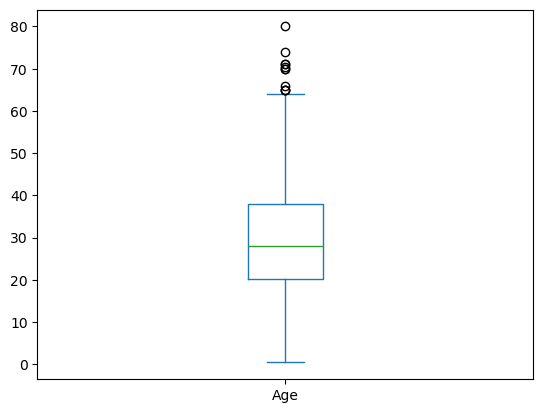

In [10]:
age.plot(kind='box')

In [11]:
# replacing Values with median
median_Value=df['Age'].median()
print(f"The value of Median is",median_Value)

The value of Median is 28.0


In [12]:
df['Age']=df['Age'].replace(np.nan,median_Value)

In [13]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [15]:
# Replacing the values with most fequent
cabin_mode=df['Cabin'].mode()[0]

In [16]:
df['Cabin']=df['Cabin'].replace(np.nan,cabin_mode)

In [17]:
# Drop rows where the 'Embarked' column has NaN values 
df.dropna(subset=['Embarked'], inplace=True) 

In [18]:
print(df['Embarked'])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 889, dtype: object


In [19]:
#  Replacing the Nan Values Of Name column with unknown Beacuse I have no choice left
df['Name'].fillna("Unknown",inplace=True)

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Price of ticket
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
duplicate_row=df.duplicated().sum()
print(f"The Number of duplicate row is {duplicate_row}")


The Number of duplicate row is 0


<Axes: >

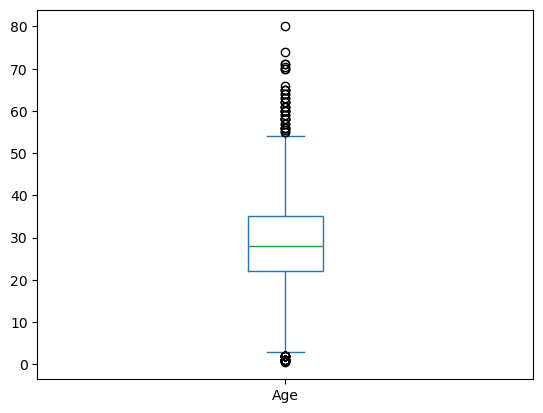

In [22]:
df.Age.plot(kind='box')

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
# Calculate IQR (Interquartile Range) 
IQR = Q3 - Q1
# print("The interquertle range is",IQR)
# Define the lower and upper boundaries for outliers 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound)
# print(upper_bound)
# Identify outliers 
outliers=df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
# print(f"Outliers:\n{outliers}")
# Optionally, remove outliers 
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
# Verify the changes
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 824, dtype: float64


<Axes: >

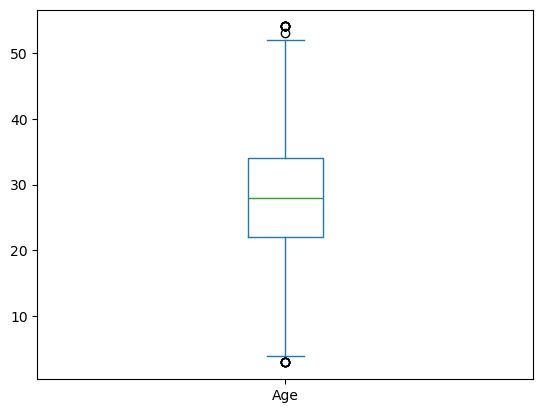

In [24]:
df.Age.plot(kind='box')

# Step 3

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Price of ticket', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Sex'>

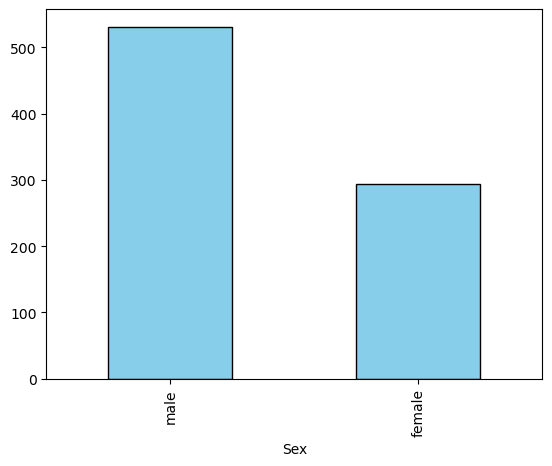

In [26]:
df.Sex.value_counts().plot(kind='bar',color='skyblue',edgecolor='black')

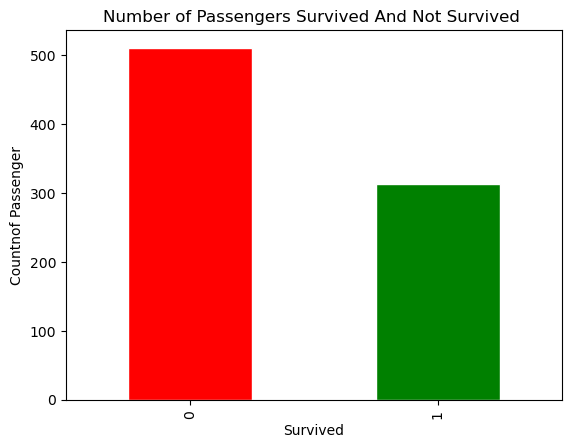

In [27]:
df.Survived.value_counts().plot(kind='bar',color=['red',"green"]
                             ,edgecolor='white'  )
# plt.legend()
plt.title("Number of Passengers Survived And Not Survived ")
plt.ylabel("Countnof Passenger")
plt.show()

Text(0, 0.5, 'Number of passenger')

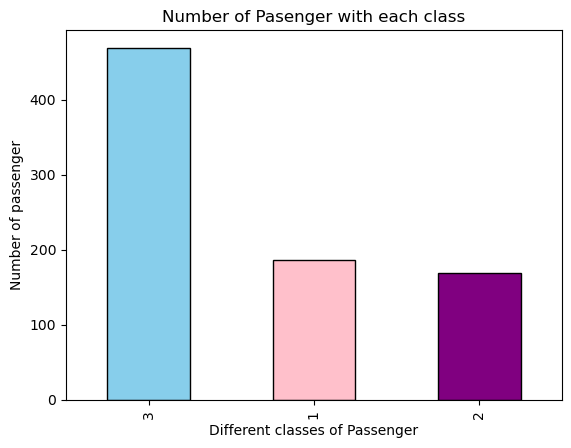

In [28]:
df.Pclass.value_counts().plot(kind='bar',color=['skyblue','pink','purple'],edgecolor='black')
plt.title("Number of Pasenger with each class")
plt.xlabel("Different classes of Passenger")
plt.ylabel("Number of passenger")

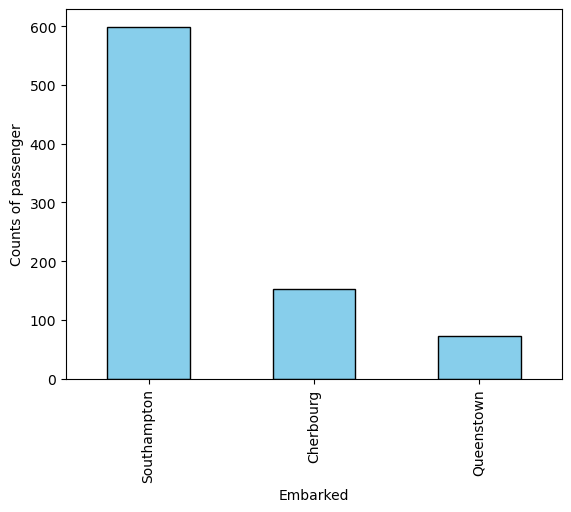

In [29]:
df.Embarked.value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
plt.ylabel("Counts of passenger")
plt.show()

Text(0, 0.5, 'Frequency')

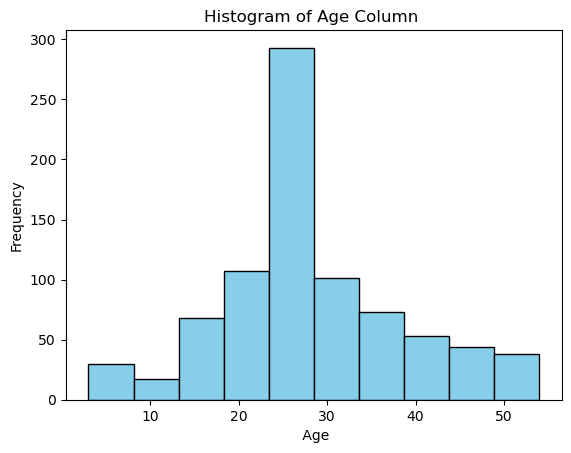

In [30]:
plt.hist(df.Age,bins=10,edgecolor='black',color='skyblue')
plt.title("Histogram of Age Column ")
plt.xlabel(" Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

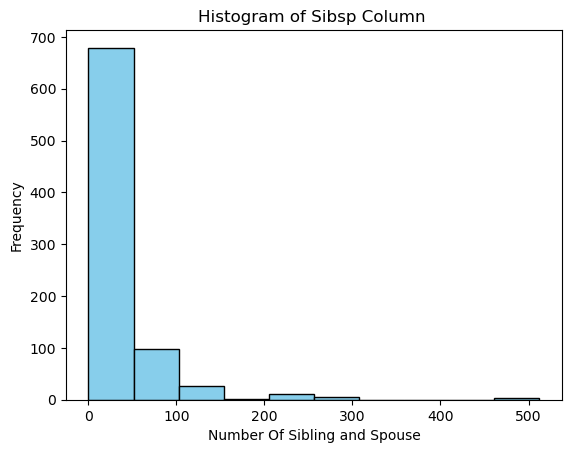

In [31]:
plt.hist(df['Price of ticket'],edgecolor='black',color='skyblue')
plt.title("Histogram of Sibsp Column ")
plt.xlabel("Number Of Sibling and Spouse")
plt.ylabel("Frequency")

(array([679.,  98.,  26.,   2.,  11.,   5.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

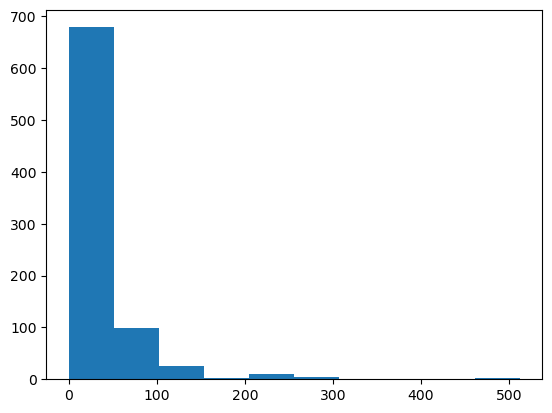

In [33]:
plt.hist(df['Price of ticket'])

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Price of ticket
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,447.837379,0.379854,2.343447,28.503641,0.508495,0.358010,31.424736
std,256.893608,0.485645,0.823268,10.178062,1.091189,0.798987,49.958119
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.208350
75%,671.250000,1.000000,3.000000,34.000000,1.000000,0.000000,30.017700
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Price of ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
correlation_matrix=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Price of ticket']].corr()

In [47]:
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Price of ticket
Survived,1.000000,-0.366204,-0.022404,-0.030172,0.074975,0.268587
Pclass,-0.366204,1.000000,-0.296257,0.056938,0.017887,-0.551968
Age,-0.022404,-0.296257,1.000000,-0.183693,-0.122756,0.097029
SibSp,-0.030172,0.056938,-0.183693,1.000000,0.408337,0.167292
Parch,0.074975,0.017887,-0.122756,0.408337,1.000000,0.190662
Price of ticket,0.268587,-0.551968,0.097029,0.167292,0.190662,1.000000


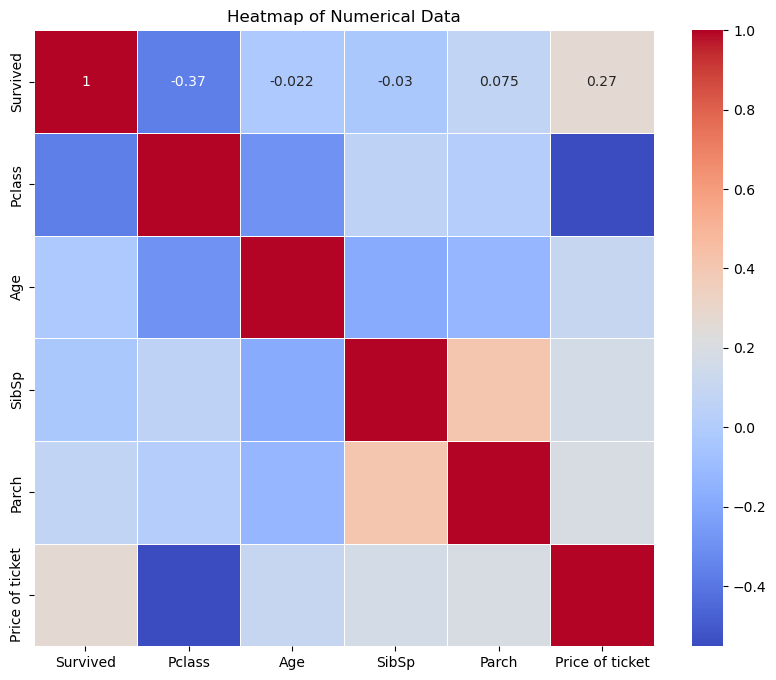

In [49]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap of Numerical Data') 
plt.show()

<Axes: xlabel='SibSp', ylabel='Price of ticket'>

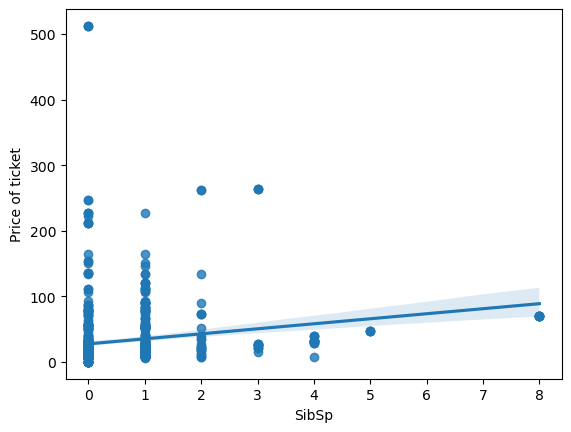

In [50]:
sns.regplot(x=df.SibSp,y=df['Price of ticket'])